In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/quicho/Escritorio/Ciencia-de-datos-con-Python-de-estadísti-a-descriptiva-a-redes-neuronales/neural_neworks':
  os.chdir(r'/home/quicho/Escritorio/Ciencia-de-datos-con-Python-de-estadísti-a-descriptiva-a-redes-neuronales/neural_neworks')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1712727227.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1712727227.0, "/usr/lib/python3.12/zipimport.py": 1712727227.0, "/usr/lib/python3.12/codecs.py": 1712727227.0, "/usr/lib/python3.12/encodings/aliases.py": 1712727227.0, "/usr/lib/python3.12/encodings/__init__.py": 1712727227.0, "/usr/lib/python3.12/encodings/utf_8.py": 1712727227.0, "/usr/lib/python3.12/abc.py": 1712727227.0, "/usr/lib/python3.12/io.py": 1712727227.0, "/usr/lib/python3.12/stat.py": 1712727227.0, "/usr/lib/python3.12/_collections_abc.py": 1712727227.0, "/usr/lib/python3.12/genericpath.py": 1712727227.0, "/usr/lib/python3.12/posixpath.py": 1712727227.0, "/usr/lib/python3.12/os.py": 1712727227.0, "/usr/lib/python3.12/_sitebuiltins.py": 1712727227.0, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/site.py": 1712727227.0, "/usr/lib/python3.12/warnings.py": 1712727227.0, "/usr/lib/python3.12/importlib/__init__.py": 1712727227.0, "/u

/tmp/ipykernel_39739/522916513.py:24: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



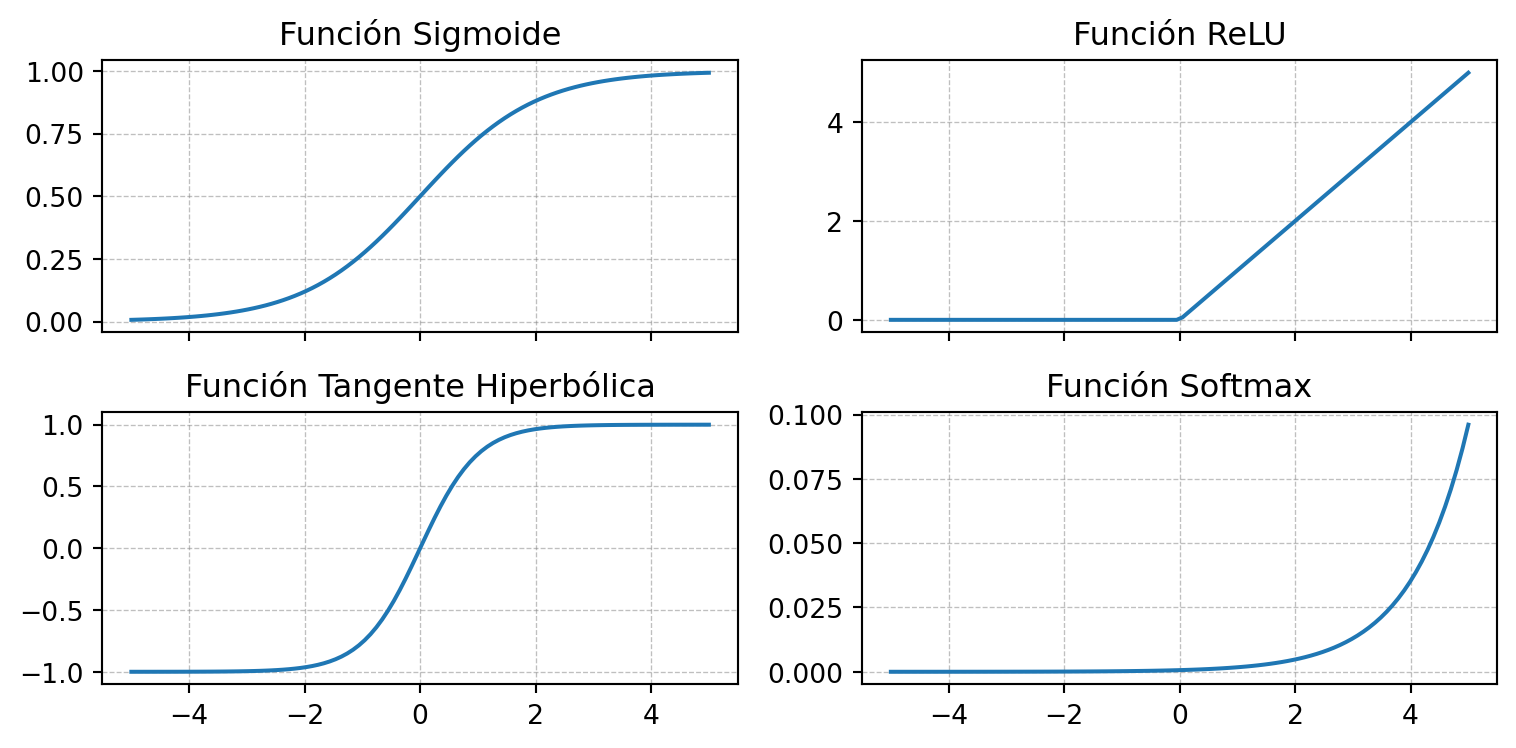

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(8, 4), sharex=True)

x = np.linspace(-5, 5, 100)

# Funciones de activación
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)
softmax = np.exp(x) / np.sum(np.exp(x))

# Gráficas
ax[0, 0].plot(x, sigmoid)
ax[0, 0].set_title("Función Sigmoide")

ax[0, 1].plot(x, relu)
ax[0, 1].set_title("Función ReLU")

ax[1, 0].plot(x, tanh)
ax[1, 0].set_title("Función Tangente Hiperbólica")

ax[1, 1].plot(x, softmax)
ax[1, 1].set_title("Función Softmax")

for i in range(2):
    for j in range(2):
        ax[i, j].grid( linestyle='--', linewidth=0.5, alpha=0.5, color='grey')

plt.tight_layout()
plt.show()

In [3]:
import numpy as np

class NeuralNetwork():
    def __init__(self, input_size, hidden_size, output_size, seed=1014):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Pesos y sesgos
        np.random.seed(seed)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.random.randn(hidden_size)
        
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.random.randn(output_size)
        
    def forward(self, X, activation):
        # Capa oculta
        hidden = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        hidden = activation(hidden)
        
        # Capa de salida
        output = np.dot(hidden, self.weights_hidden_output) + self.bias_hidden_output
        
        return output

In [4]:
# Datos de entrada
X = np.random.randn(10, 1)

# Parámetros de la red neuronal
input_size = 1
hidden_size = 10
output_size = 1

# Red Neuronal
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Función de activación identidad
def identity(x):
    return x

# Predicciones
y_pred = nn.forward(X, identity)

print(y_pred)

[[-1.99907094]
 [-1.81906008]
 [-2.09323783]
 [-2.01463994]
 [-1.97149406]
 [-1.88913769]
 [-1.83845091]
 [-2.08788242]
 [-1.84281395]
 [-1.90193263]]


In [5]:
print(f"Pesos capa oculta: {nn.weights_input_hidden}\n")
print(f"Sesgos capa oculta: {nn.bias_input_hidden}\n")
print(f"Pesos capa de salida: {nn.weights_hidden_output.T}\n")
print(f"Sesgos capa de salida: {nn.bias_hidden_output}\n")

Pesos capa oculta: [[ 0.75943278 -1.00725987 -0.64499024 -0.26674068  0.29125552  0.14820587
   0.6382988   0.46738854  0.53122954  1.1840206 ]]

Sesgos capa oculta: [-1.25173295 -1.30489407  0.20194032 -0.83407915  0.67556507 -1.65562438
 -0.26710189 -0.77413114 -0.14915279  2.15093091]

Pesos capa de salida: [[-0.25697236  0.50673502 -1.31687341  1.71747235 -0.12242967 -0.06419002
   0.47479916 -0.01225672  1.10530347 -0.54019387]]

Sesgos capa de salida: [1.4985733]



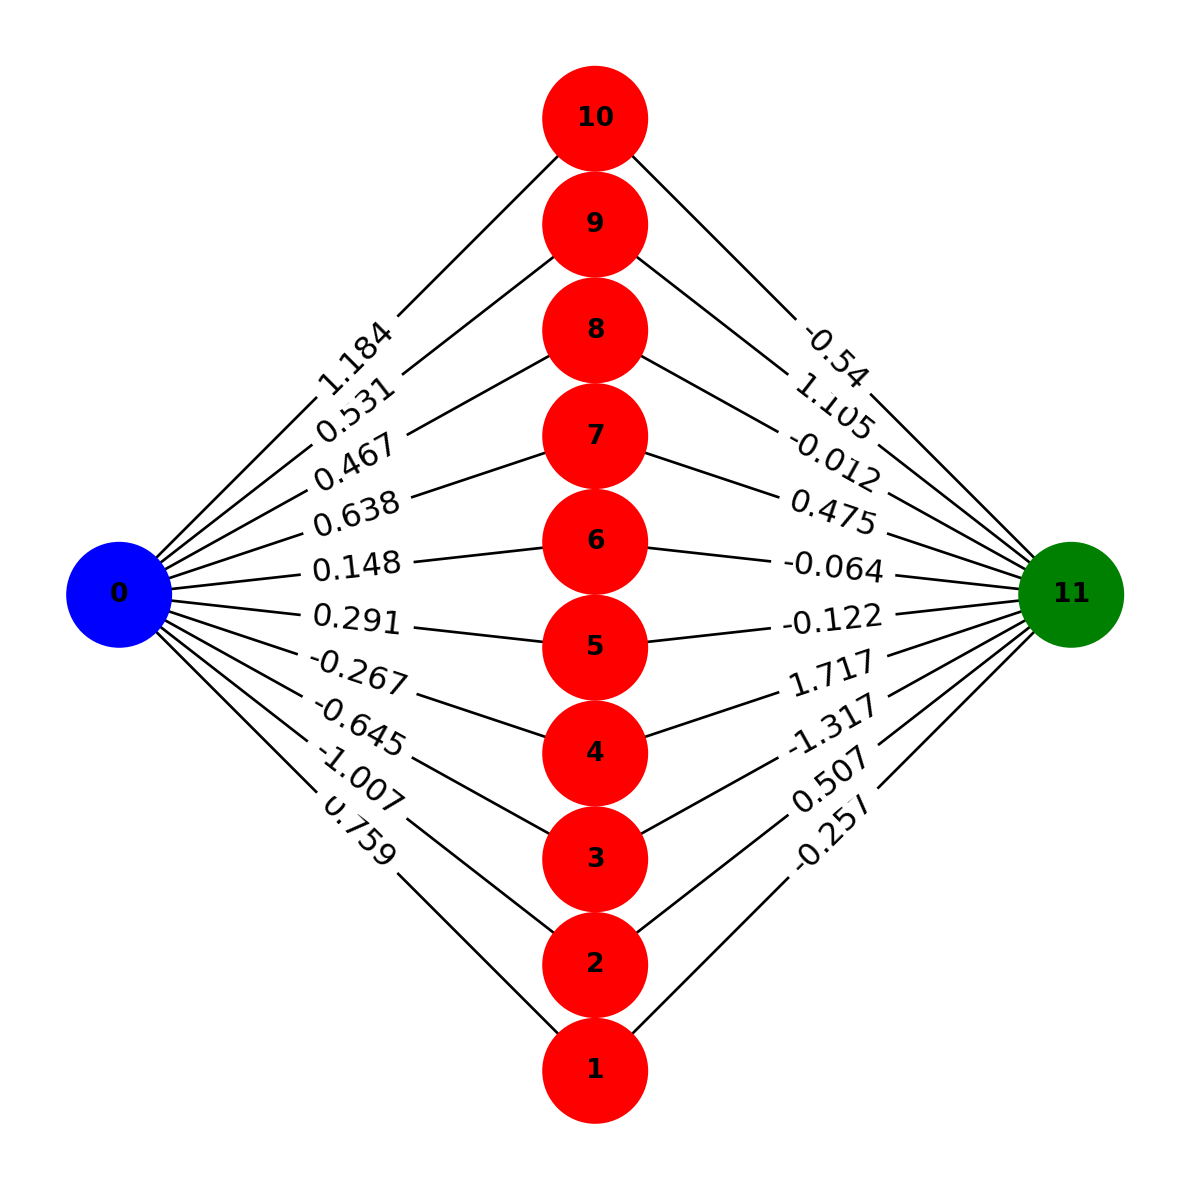

In [6]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

# Colores para las capas
subset_colors = ['blue', 'red', 'green']

def multilayered_graph(input_size, hidden_size, output_size, weights_input_hidden, weights_hidden_output):
    # Crear los rangos para las capas
    subset_sizes = [input_size, hidden_size, output_size]
    extents = nx.utils.pairwise(itertools.accumulate((0,) + tuple(subset_sizes)))
    layers = [range(start, end) for start, end in extents]
    
    # Crear el gráfico
    G = nx.Graph()
    for i, layer in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
        
    # Añadir los bordes con pesos para capa de entrada a oculta
    for i, j in itertools.product(layers[0], layers[1]):
        G.add_edge(i, j, weight=round(weights_input_hidden[i, j - layers[1][0]], 3))
        
    # Añadir los bordes con pesos para capa oculta a salida
    for i, j in itertools.product(layers[1], layers[2]):
        G.add_edge(i, j, weight=round(weights_hidden_output[i - layers[1][0], j - layers[2][0]], 3))
    
    return G

# Crear el gráfico con los pesos
G = multilayered_graph(input_size, hidden_size, output_size, nn.weights_input_hidden, nn.weights_hidden_output)

# Colores para los nodos según su capa
color = [subset_colors[data["layer"]] for node, data in G.nodes(data=True)]

# Posición de los nodos
pos = nx.multipartite_layout(G, subset_key="layer")

# Dibujar el gráfico
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color=color, node_size=1500, font_size=10, font_weight='bold')

# Dibujar los bordes con los pesos
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.show()